# Описание данных

Разработать модель для определения фишинговых и легитимных вебсайтов, поступающих на корпоративные почтовые серверы банка. Модель должна анализировать URL и содержимое вебсайта, выявлять фишинговые атаки и блокировать подозрительные сообщения до их попадания в почтовые ящики сотрудников.

**Цель**: Разработать модель, которая сможет классифицировать веб-сайты на фишинговые и легитимные, используя параметры URL и содержимого страниц. Для этого задача будет решена в два этапа: сначала провести кластеризацию веб-сайтов, а затем использовать результаты кластеризации для обучения модели логистической регрессии.

- **FILENAME**: Имя файла.
- **URL**: Сам URL, который анализируется.
- **URLLength**: Общее количество символов в URL.
- **Domain**: Основное доменное имя, извлеченное из URL.
- **DomainLength**: Общее количество символов в домене.
- **IsDomainIP**: Булевый индикатор (1 или 0), указывающий, является ли домен IP-адресом.
- **TLD**: Домен верхнего уровня (TLD) URL, например .com, .edu, .net.
- **URLSimilarityIndex**: Мера визуального сходства данного URL с известным легитимным URL, используемая для обнаружения фишинга.
- **CharContinuationRate**: Соотношение непрерывных последовательностей символов (букв, цифр, специальных символов) к общей длине URL.
- **TLDLegitimateProb**: Вероятность того, что TLD является легитимным, основанная на его частоте в легитимных URL.
- **URLCharProb**: Вероятность использования символов в URL на основе предопределенного распределения символов для легитимных URL.
- **TLDLength**: Количество символов в TLD.
- **NoOfSubDomain**: Количество поддоменов в URL.
- **HasObfuscation**: Булевый индикатор (1 или 0), указывающий, содержит ли URL техники обфускации.
- **NoOfObfuscatedChar**: Количество обфусцированных символов в URL.
- **ObfuscationRatio**: Соотношение обфусцированных символов к общей длине URL.
- **NoOfLettersInURL**: Общее количество букв в URL.
- **LetterRatioInURL**: Соотношение букв к общей длине URL.
- **NoOfDegitsInURL**: Общее количество цифр в URL.
- **DegitRatioInURL**: Соотношение цифр к общей длине URL.
- **NoOfEqualsInURL**: Количество знаков равно (=) в URL.
- **NoOfQMarkInURL**: Количество знаков вопроса (?) в URL.
- **NoOfAmpersandInURL**: Количество амперсандов (&) в URL.
- **NoOfOtherSpecialCharsInURL**: Количество других специальных символов (не включая =, ?, &) в URL.
- **SpacialCharRatioInURL**: Соотношение всех специальных символов к общей длине URL.
- **IsHTTPS**: Булевый индикатор (1 или 0), указывающий, использует ли URL HTTPS.
- **LineOfCode**: Количество строк кода в HTML страницы.
- **LargestLineLength**: Длина самой длинной строки в HTML коде.
- **HasTitle**: Булевый индикатор (1 или 0), указывающий, содержит ли HTML тег title.
- **Title**: Текст внутри тега title HTML.
- **DomainTitleMatchScore**: Оценка соответствия доменного имени содержимому тега title.
- **URLTitleMatchScore**: Оценка соответствия URL содержимому тега title.
- **HasFavicon**: Булевый индикатор (1 или 0), указывающий, содержит ли HTML ссылку на favicon.
- **Robots**: Содержимое файла robots.txt, связанного с доменом.
- **IsResponsive**: Булевый индикатор (1 или 0), указывающий, является ли дизайн веб-страницы адаптивным.
- **NoOfURLRedirect**: Количество перенаправлений URL на другой URL.
- **NoOfSelfRedirect**: Количество перенаправлений URL на сам себя.
- **HasDescription**: Булевый индикатор (1 или 0), указывающий, содержит ли HTML мета-тег description.
- **NoOfPopup**: Количество всплывающих окон, вызванных веб-страницей.
- **NoOfiFrame**: Количество фреймов (iframe), встроенных в HTML.
- **HasExternalFormSubmit**: Булевый индикатор (1 или 0), указывающий, отправляются ли формы в HTML на внешний домен.
- **HasSocialNet**: Булевый индикатор (1 или 0), указывающий, включает ли веб-страница ссылки на социальные сети.
- **HasSubmitButton**: Булевый индикатор (1 или 0), указывающий, содержит ли HTML кнопку отправки формы.
- **HasHiddenFields**: Булевый индикатор (1 или 0), указывающий, содержит ли HTML скрытые поля.
- **HasPasswordField**: Булевый индикатор (1 или 0), указывающий, содержит ли HTML поля для ввода пароля.
- **Bank**: Булевый индикатор (1 или 0), указывающий, содержит ли содержимое веб-страницы информацию о банковских услугах.
- **Pay**: Булевый индикатор (1 или 0), указывающий, содержит ли содержимое веб-страницы информацию о платежных услугах.
- **Crypto**: Булевый индикатор (1 или 0), указывающий, содержит ли содержимое веб-страницы информацию о криптовалюте.
- **HasCopyrightInfo**: Булевый индикатор (1 или 0), указывающий, содержит ли HTML информацию об авторских правах.
- **NoOfImage**: Количество изображений, встроенных в HTML.
- **NoOfCSS**: Количество CSS файлов, связанных с HTML.
- **NoOfJS**: Количество JavaScript файлов, связанных с HTML.
- **NoOfSelfRef**: Количество самоссылающихся гиперссылок в HTML.
- **NoOfEmptyRef**: Количество пустых гиперссылок (href="") в HTML.
- **NoOfExternalRef**: Количество внешних гиперссылок в HTML.

# Предобработка данных

In [321]:
import pandas as pd
from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics.cluster import rand_score
from sklearn.metrics import silhouette_score

In [322]:
def print_binary_column_percents(data, col_name):
    count_0 = data[data[col_name] == 0].shape[0]
    count_1 = data[data[col_name] == 1].shape[0]
    total_count = data.shape[0]

    print(f"0: {100 * count_0 / total_count}; 1: {100 * count_1 / total_count}")

def apply_3sigma_rule(df, column_name):
    mean = df[column_name].mean()
    std = df[column_name].std()

    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std

    filtered_df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return filtered_df

In [323]:
df = pd.read_csv("dataset.csv")

In [324]:
df

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.000000,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.000000,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.000000,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.000000,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.000000,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,660997.txt,https://www.skincareliving.com,29,www.skincareliving.com,22,0,com,100.000000,1.000000,0.522907,...,1,0,1,51,7,21,187,2,191,1
235791,77185.txt,https://www.winchester.gov.uk,28,www.winchester.gov.uk,21,0,uk,100.000000,0.785714,0.028555,...,1,0,0,50,1,7,88,0,31,1
235792,622132.txt,https://www.nononsensedesign.be,30,www.nononsensedesign.be,23,0,be,100.000000,1.000000,0.003319,...,0,0,1,27,10,30,58,2,67,1
235793,7503962.txt,https://patient-cell-40f5.updatedlogmylogin.wo...,55,patient-cell-40f5.updatedlogmylogin.workers.dev,47,0,dev,28.157537,0.465116,0.000961,...,0,0,0,0,0,3,0,0,0,0


In [325]:
df.columns

Index(['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP',
       'TLD', 'URLSimilarityIndex', 'CharContinuationRate',
       'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain',
       'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio',
       'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL',
       'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect',
       'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
       'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOf

## URLLength

Длина URL вебсайта. Фишинговые вебсайты часто используют маскирующие символы и в целом могут быть длиннее легитимных

<Axes: xlabel='URLLength', ylabel='Count'>

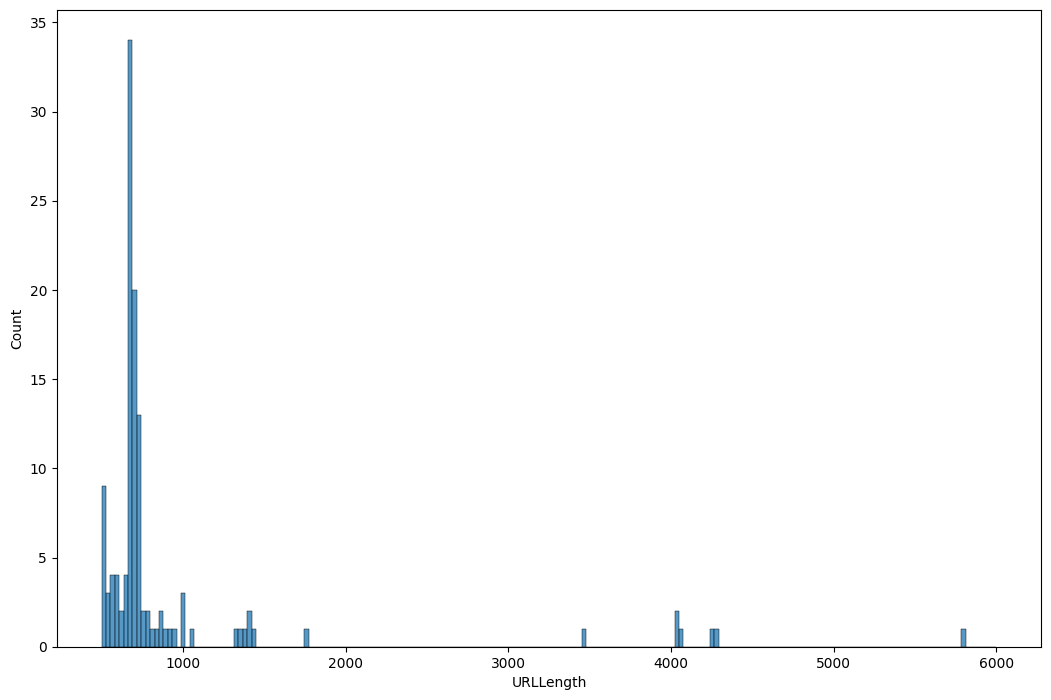

In [326]:
sn.histplot(df['URLLength'], binrange=[500, 6000])

<Axes: xlabel='URLLength', ylabel='Count'>

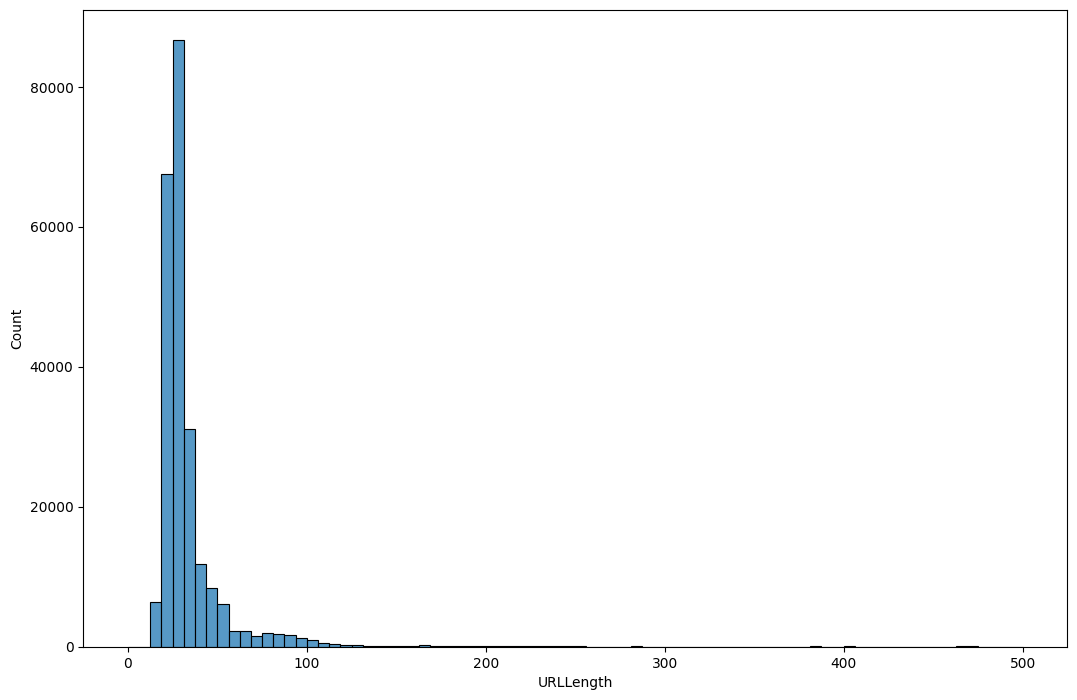

In [327]:
sn.histplot(df['URLLength'], binrange=[0, 500], bins=80)

In [328]:
filtered = apply_3sigma_rule(df, "URLLength")

In [329]:
filtered

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.000000,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.000000,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.000000,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.000000,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.000000,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,660997.txt,https://www.skincareliving.com,29,www.skincareliving.com,22,0,com,100.000000,1.000000,0.522907,...,1,0,1,51,7,21,187,2,191,1
235791,77185.txt,https://www.winchester.gov.uk,28,www.winchester.gov.uk,21,0,uk,100.000000,0.785714,0.028555,...,1,0,0,50,1,7,88,0,31,1
235792,622132.txt,https://www.nononsensedesign.be,30,www.nononsensedesign.be,23,0,be,100.000000,1.000000,0.003319,...,0,0,1,27,10,30,58,2,67,1
235793,7503962.txt,https://patient-cell-40f5.updatedlogmylogin.wo...,55,patient-cell-40f5.updatedlogmylogin.workers.dev,47,0,dev,28.157537,0.465116,0.000961,...,0,0,0,0,0,3,0,0,0,0


In [330]:
filtered = filtered.reset_index(drop=True)

<Axes: xlabel='URLLength', ylabel='Count'>

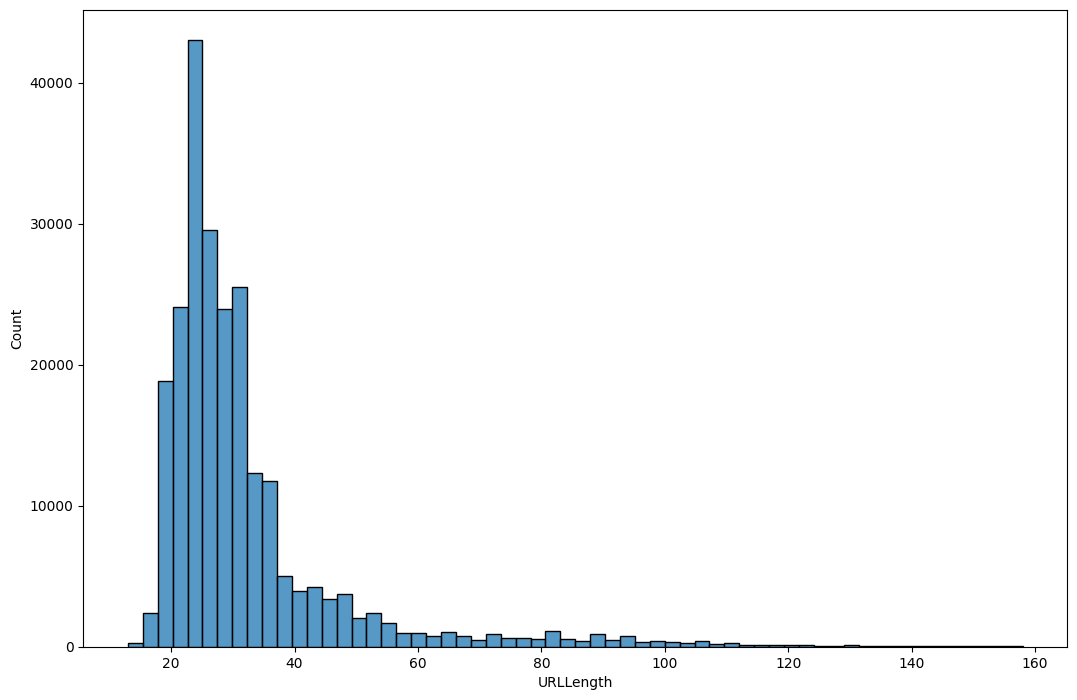

In [331]:
sn.histplot(filtered['URLLength'], bins=60)

<Axes: xlabel='URLLength', ylabel='DomainLength'>

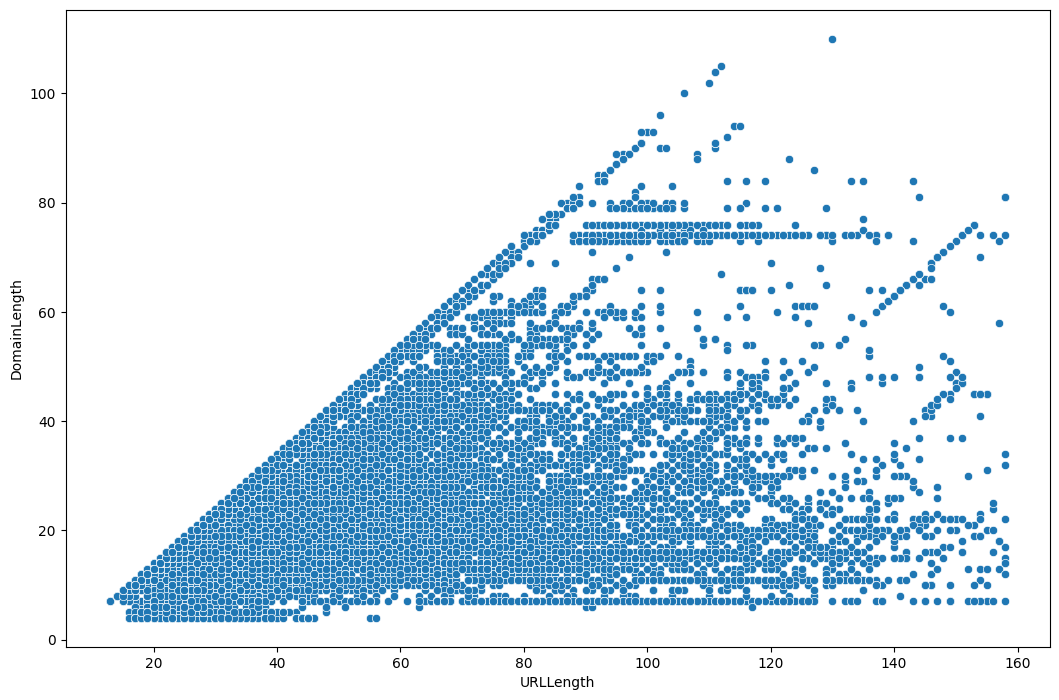

In [332]:
sn.scatterplot(data=filtered, x="URLLength", y="DomainLength")

## IsDomainIP

Используется ли вместо доменного имени IP адрес (например, “https://142.250.185.196”). Это означает, что адрес скорее всего не зарегистрирован в системе доменных имен, что может указывать на его нелегитимность.

<Axes: xlabel='IsDomainIP', ylabel='Count'>

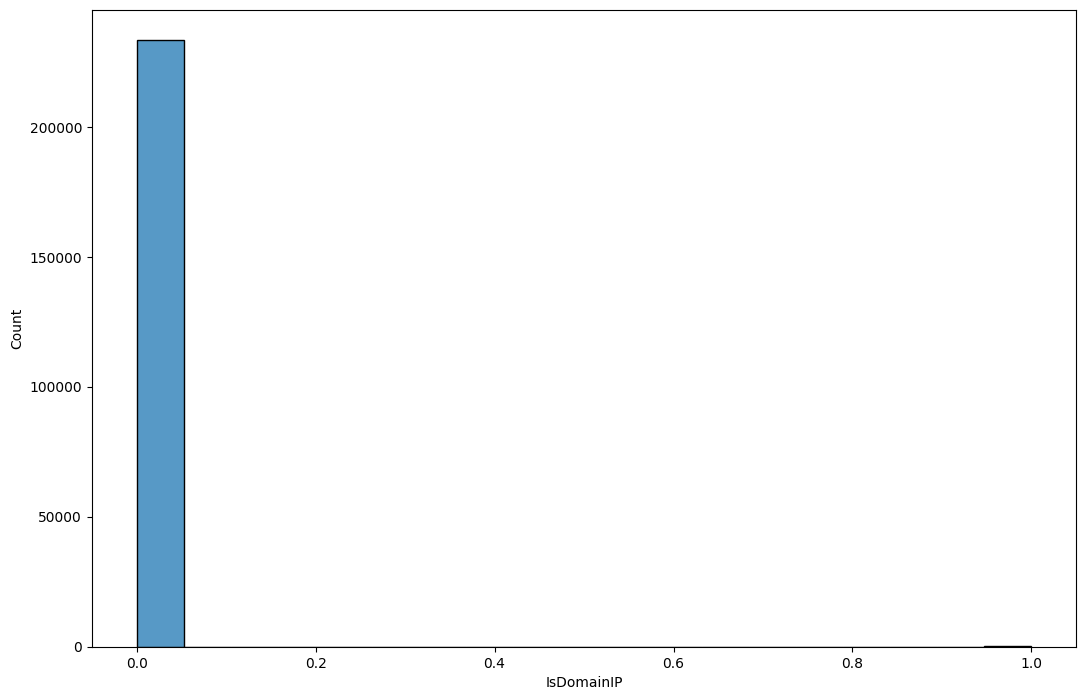

In [333]:
sn.histplot(filtered["IsDomainIP"])

In [334]:
filtered[filtered["IsDomainIP"] == 1].shape[0]

204

In [335]:
filtered[filtered["IsDomainIP"] == 0].shape[0]

233393

In [336]:
filtered = filtered.drop(columns=["IsDomainIP"])

## TLD

Top Level Domain - домен верхнего уровня. Фишинговые вебсайты в основном используют непопулярные среди легитимных вебсайтов адреса доменов

In [337]:
tld_counts = filtered['TLD'].value_counts()
top_tlds = tld_counts.nlargest(10).index
filtered_df = filtered[filtered['TLD'].isin(top_tlds)]

<Axes: xlabel='TLD', ylabel='Count'>

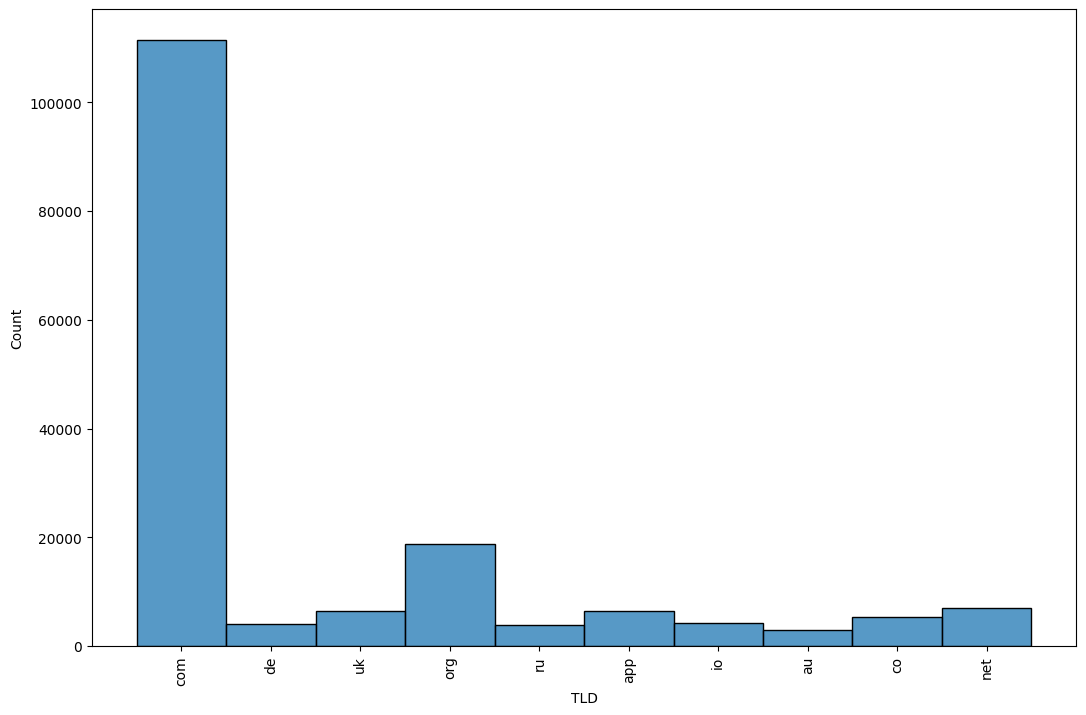

In [338]:
rcParams['figure.figsize'] = 12.7, 8.27
plt.xticks(rotation=90)
sn.histplot(filtered_df["TLD"])

## NoOfSubDomain

Кол-во доменных имен 3-го уровня (например, “www”). В фишинговых сайтах большое кол-во подобных имен может применяться для попытки выдать вебсайт за легитимный. Однако, в подавляющем большинстве URL используется одно доменное имя 3-го уровня.

<Axes: xlabel='NoOfSubDomain', ylabel='Count'>

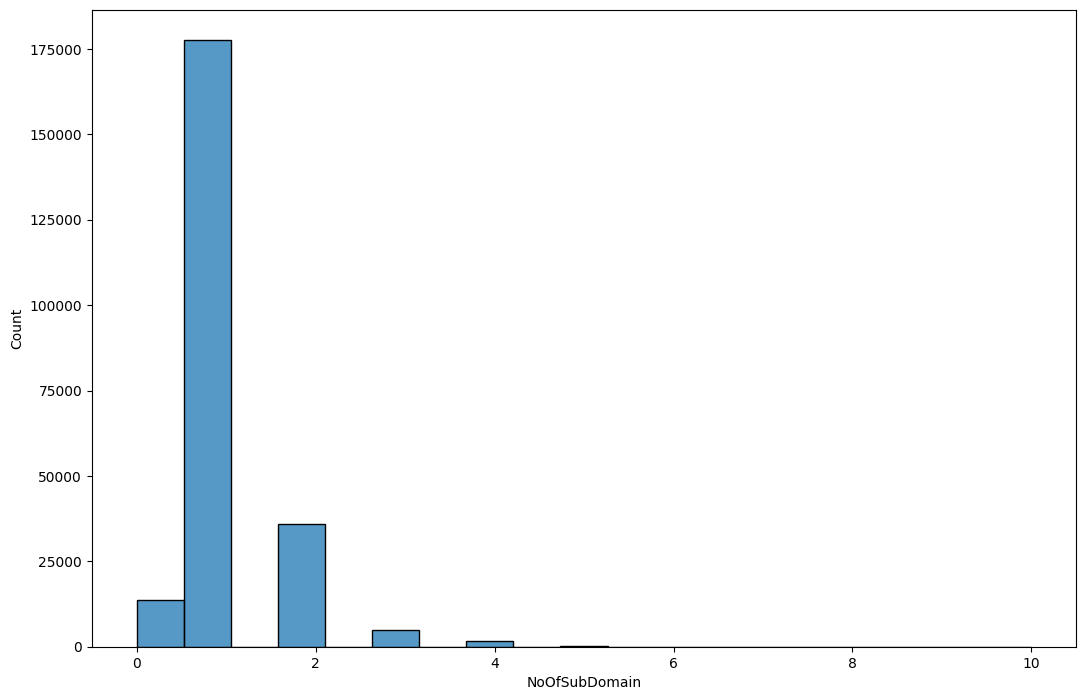

In [339]:
sn.histplot(filtered['NoOfSubDomain'])

## NoOfObfuscatedChar

Число замаскированных символов. Фишинговые вебсайты могут использовать подобную технику маскирования символов. Например, адрес "https://google.com@%77%69%6b%69%70%65%64%69%61%2e%6f%72%67" ведет на wikipedia.org.

<Axes: xlabel='NoOfObfuscatedChar', ylabel='Count'>

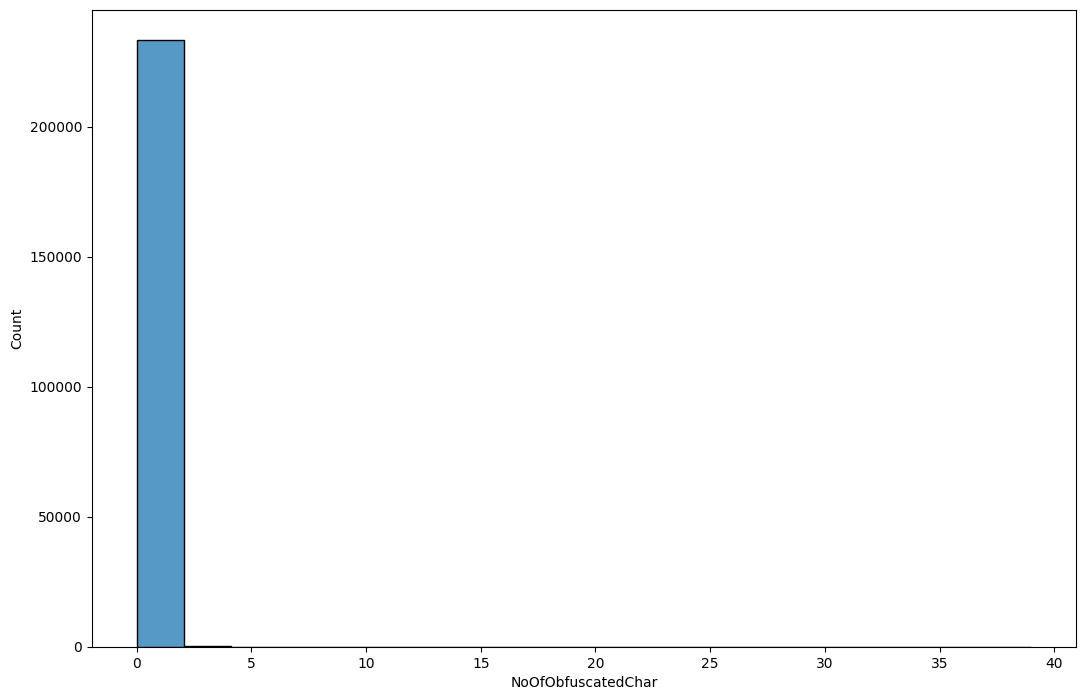

In [340]:
sn.histplot(filtered['NoOfObfuscatedChar'])

In [341]:
filtered[filtered['NoOfObfuscatedChar'] > 0].shape[0]

332

In [342]:
filtered[filtered['NoOfObfuscatedChar'] == 0].shape[0]

233265

In [343]:
filtered = filtered.drop(columns=["NoOfObfuscatedChar"])

## IsHTTPs

Используется ли защищенная версия протокола HTTP. Фишинговые вебсайты зачастую не используют безопасное подключение.

<Axes: xlabel='IsHTTPS', ylabel='Count'>

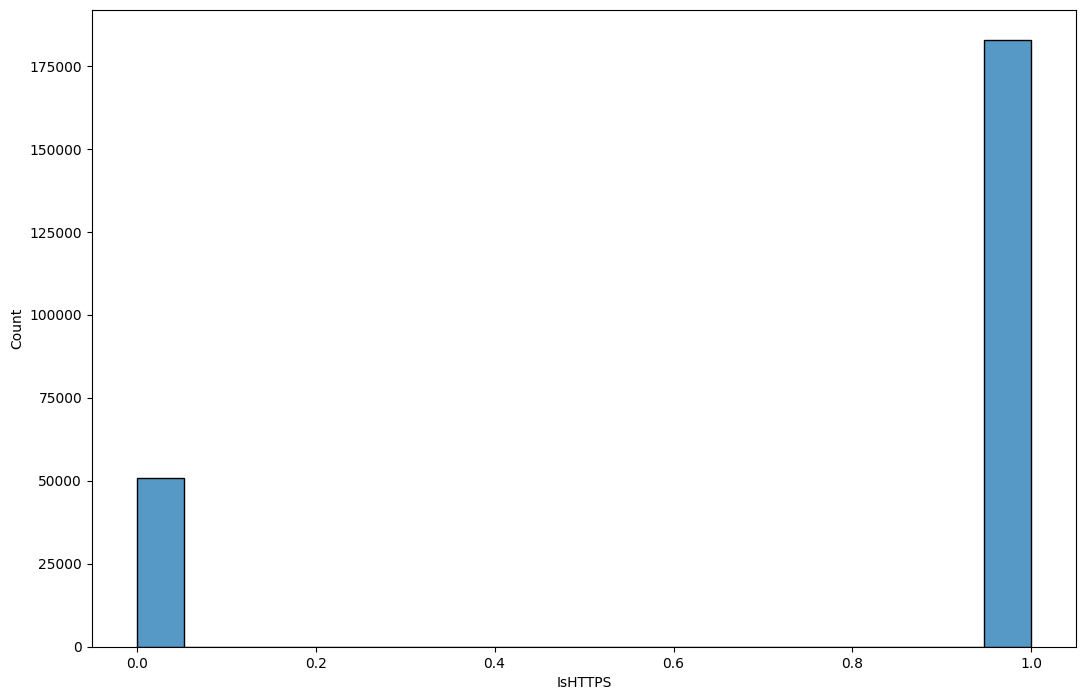

In [344]:
sn.histplot(filtered['IsHTTPS'])

In [345]:
hasHTTPS = 100 * filtered[filtered['IsHTTPS'] == 1].shape[0] / filtered.shape[0]
hasHTTPS

78.24458362050882

In [346]:
noHTTPS = 100 * filtered[filtered['IsHTTPS'] == 0].shape[0] / filtered.shape[0]
noHTTPS

21.755416379491177

## HasTitle

У многих легитимных вебсайтов есть заголовки страниц. Отсутствие тегов заголовков в HTML может указывать на фишинговый вебсайт.

<Axes: xlabel='HasTitle', ylabel='Count'>

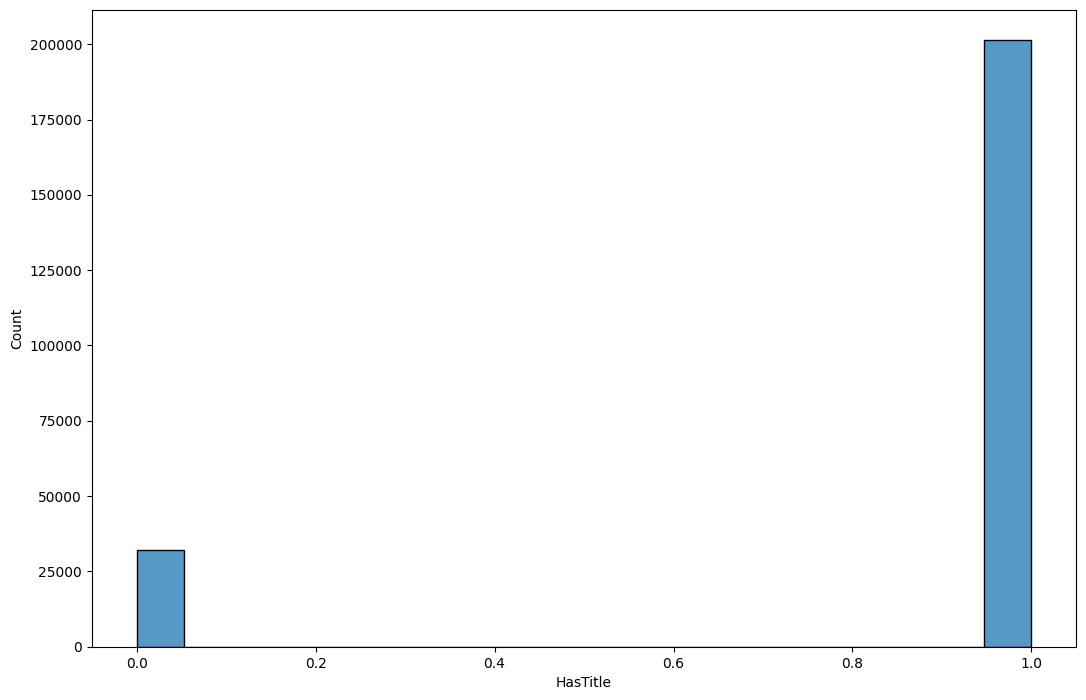

In [347]:
sn.histplot(filtered['HasTitle'])

In [348]:
hasTitle = 100 * filtered[filtered['HasTitle'] == 1].shape[0] / filtered.shape[0]
hasTitle

86.18646643578471

In [349]:
noTitle = 100 * filtered[filtered['HasTitle'] == 0].shape[0] / filtered.shape[0]
noTitle

13.813533564215295

## HasFavicon

Большинство легитимных веб-сайтов включают логотип своего сайта в тег ``favicon``.

<Axes: xlabel='HasFavicon', ylabel='Count'>

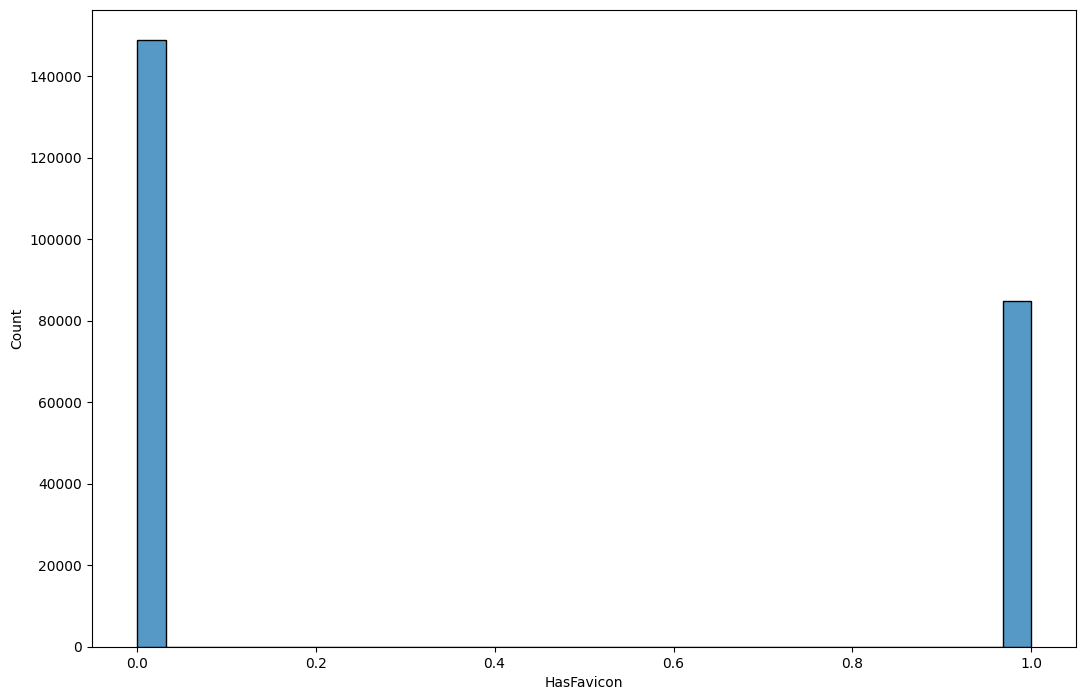

In [350]:
sn.histplot(filtered['HasFavicon'])

## IsResponsive

Поддерживает ли вебсайт различное соотношение сторон. Фишинговые вебсайты могут пренебрегать данным функционалом.

<Axes: xlabel='IsResponsive', ylabel='Count'>

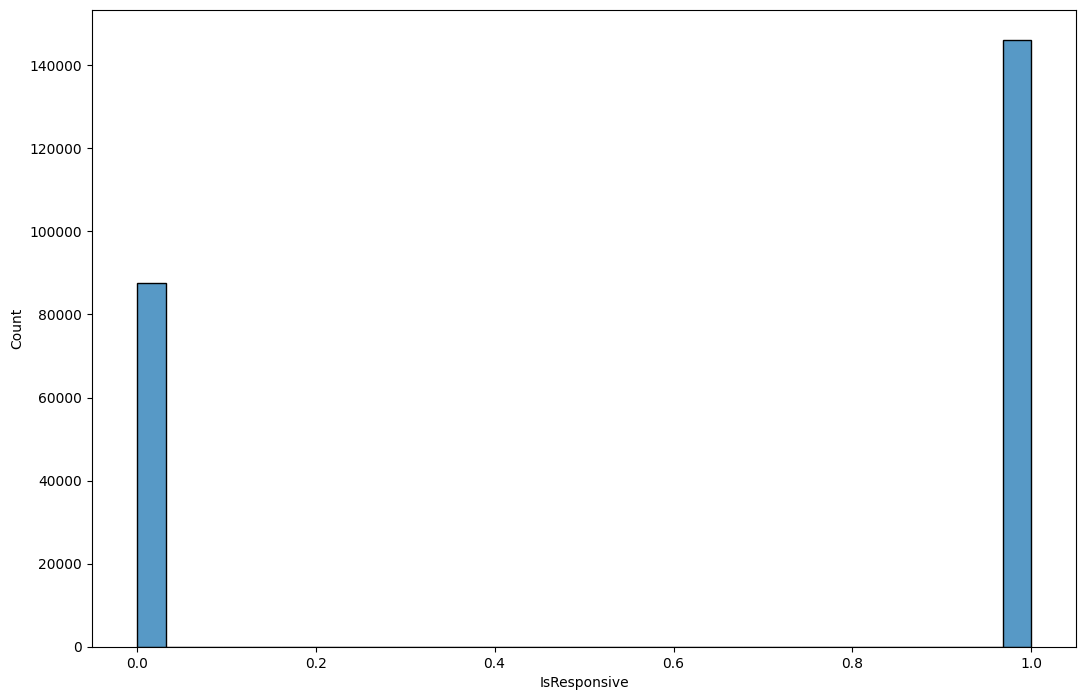

In [351]:
sn.histplot(filtered['IsResponsive'])

## HasDescription

Легитимные вебсайты предоставляют описания страниц для каждой из них с помощью тэга ``description``.

<Axes: xlabel='HasDescription', ylabel='Count'>

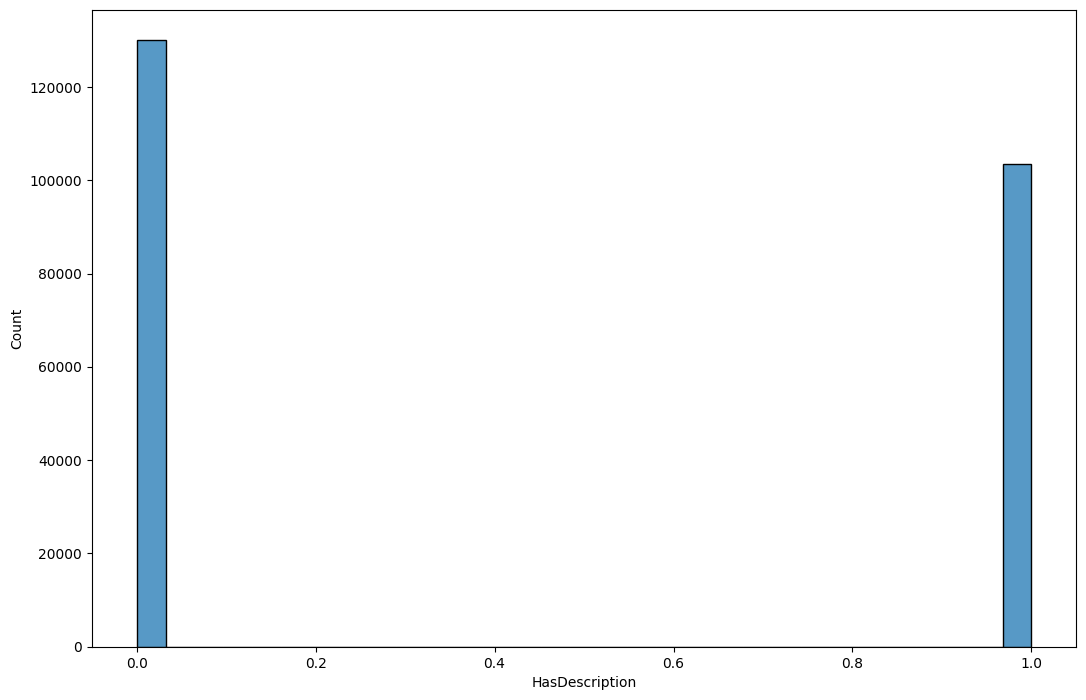

In [352]:
sn.histplot(filtered['HasDescription'])

## NoOfPopup

Кол-во всплывающих элементов (определяются из кол-ва HTML тэгов). Часто используются фишинговыми вебсайтами для отвлечения внимания пользователей.

<Axes: xlabel='NoOfPopup', ylabel='Count'>

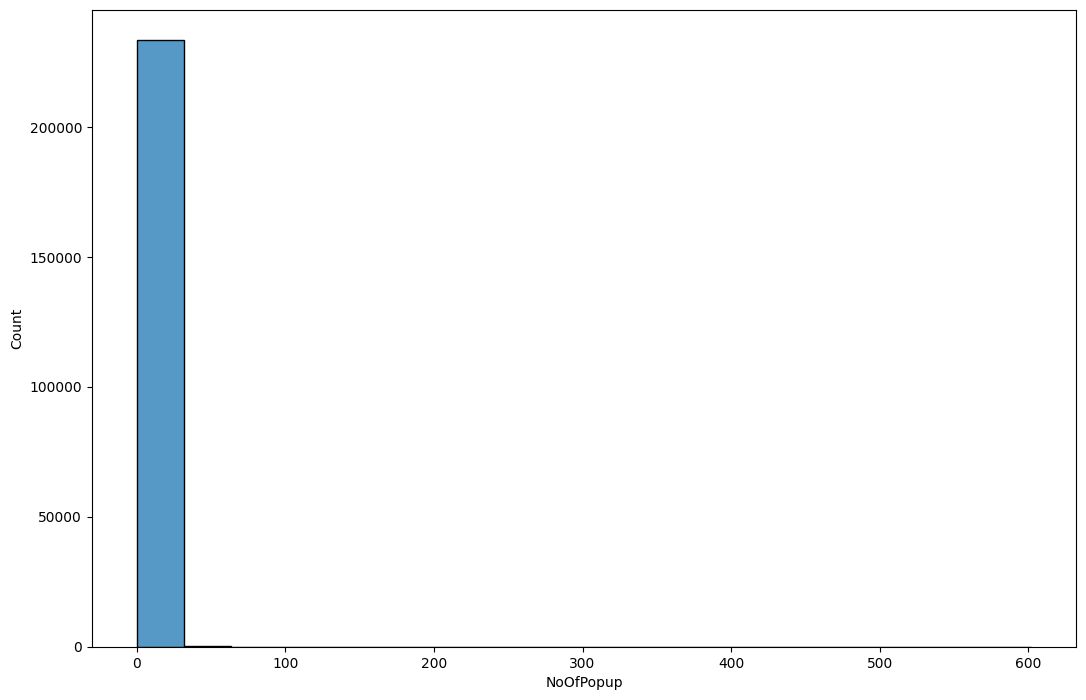

In [353]:
sn.histplot(filtered['NoOfPopup'])

<Axes: xlabel='NoOfPopup', ylabel='Count'>

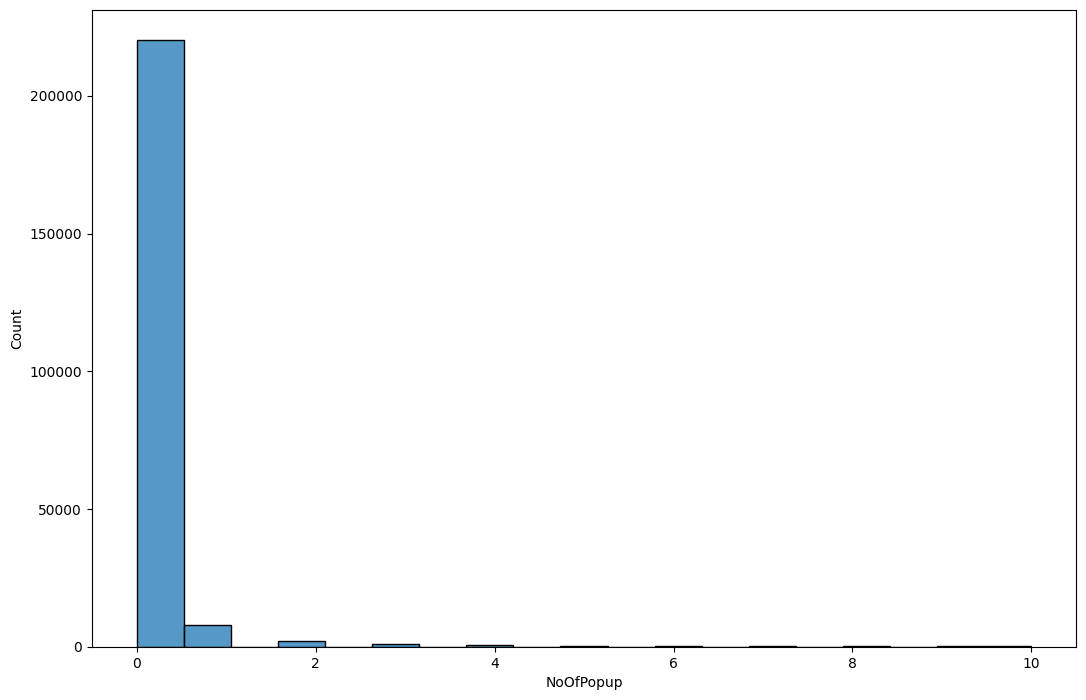

In [354]:
sn.histplot(filtered['NoOfPopup'], binrange=[0, 10])

In [355]:
filtered = filtered.drop(columns=["NoOfPopup"])

## NoOfiFrame

Кол-во всплывающих элементов другого типа (определяются из кол-ва HTML тэгов).

<Axes: xlabel='NoOfiFrame', ylabel='Count'>

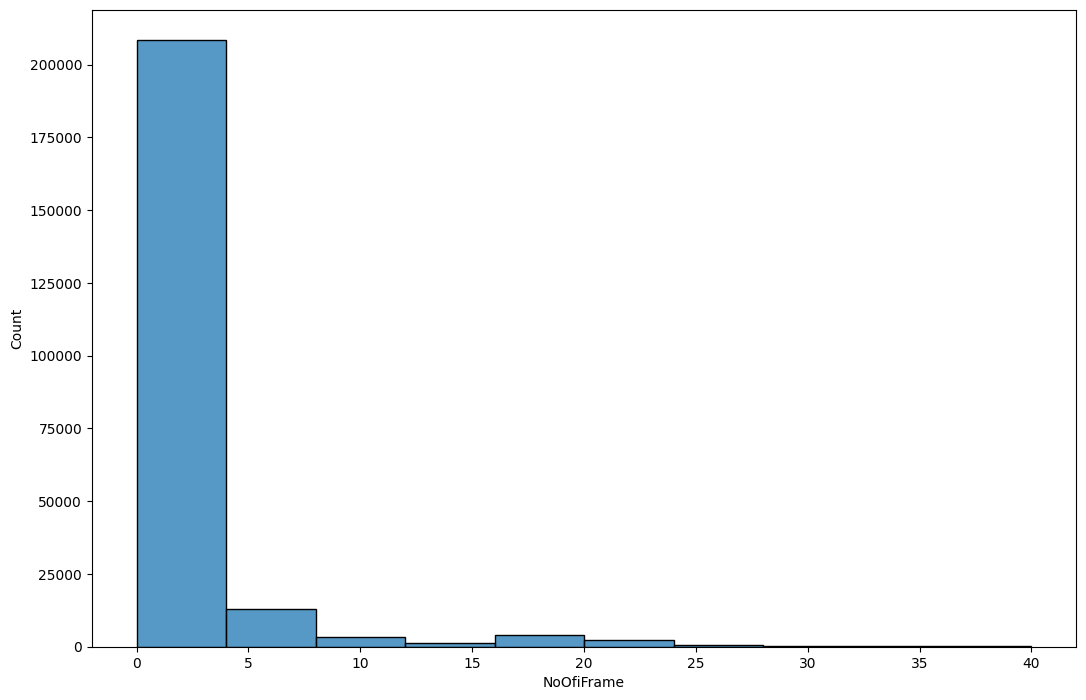

In [356]:
sn.histplot(filtered['NoOfiFrame'], binrange=[0, 40], bins=10)

In [357]:
filtered[filtered['NoOfiFrame'] == 0].shape[0]

155486

In [358]:
filtered[filtered['NoOfiFrame'] == 1].shape[0]

23416

In [359]:
filtered_by_iframe = apply_3sigma_rule(filtered, 'NoOfiFrame')

<Axes: xlabel='NoOfiFrame', ylabel='Count'>

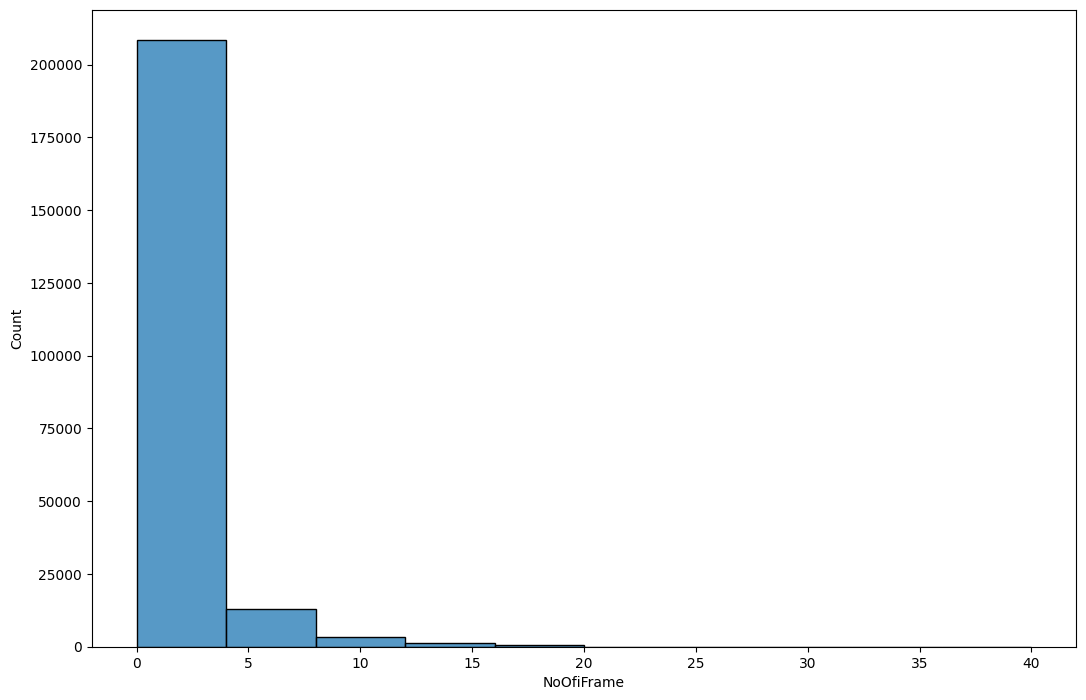

In [360]:
sn.histplot(filtered_by_iframe['NoOfiFrame'], binrange=[0, 40], bins=10)

In [361]:
filtered = filtered_by_iframe

In [362]:
filtered = filtered.reset_index(drop=True)

## HasSocialNet

Есть ли ссылки на социальные сети. На многих легитимных вебсайтах есть подобные ссылки.

<Axes: xlabel='HasSocialNet', ylabel='Count'>

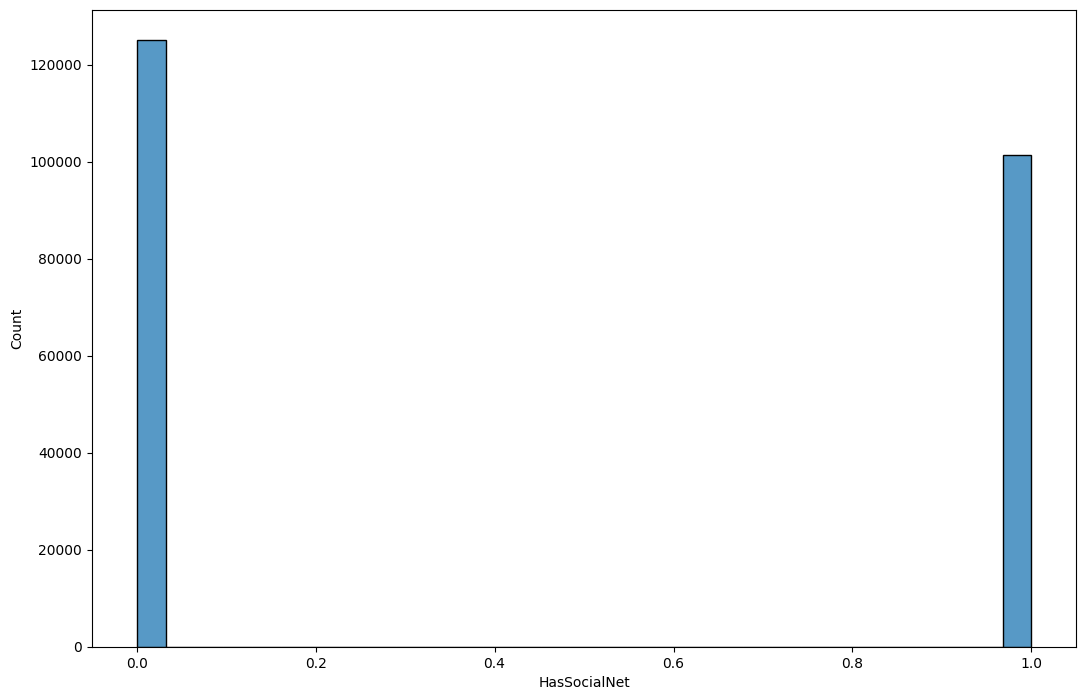

In [363]:
sn.histplot(filtered['HasSocialNet'])

## HasCopyrightInfo

Есть ли информация об авторских правах.

<Axes: xlabel='HasCopyrightInfo', ylabel='Count'>

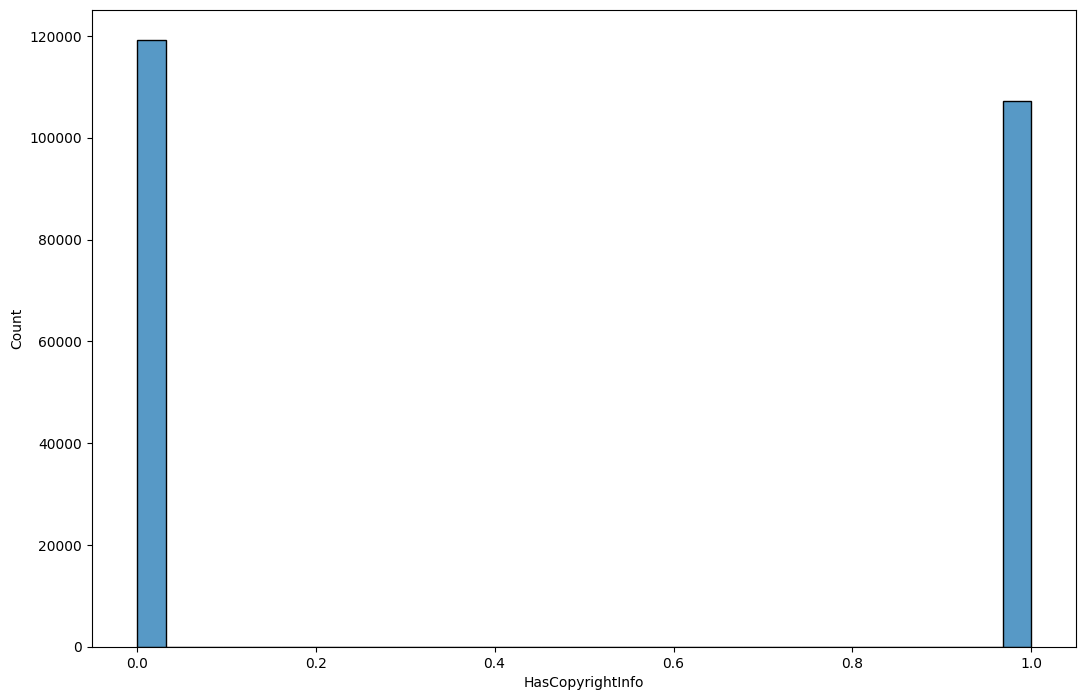

In [364]:
sn.histplot(filtered['HasCopyrightInfo'])

## HasObfuscation

Есть ли замаскированные символы.

<Axes: xlabel='HasObfuscation', ylabel='Count'>

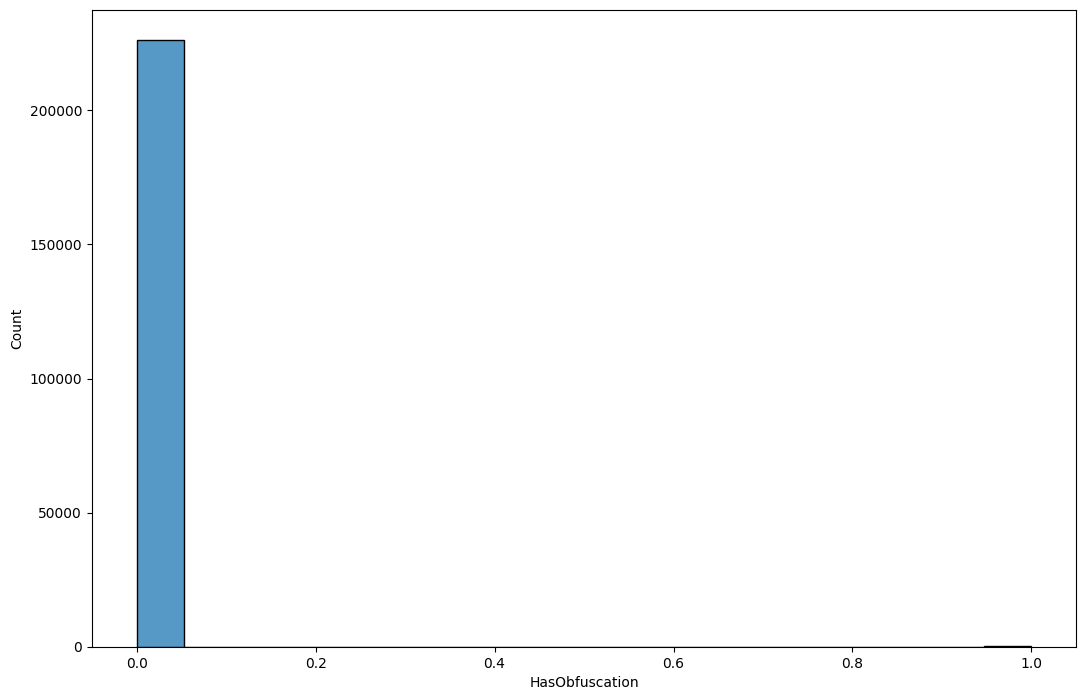

In [365]:
sn.histplot(filtered['HasObfuscation'])

In [366]:
filtered = filtered.drop(columns=["HasObfuscation"])

## NoOfURLRedirect

Количество перенаправлений на другой URL.

<Axes: xlabel='NoOfURLRedirect', ylabel='Count'>

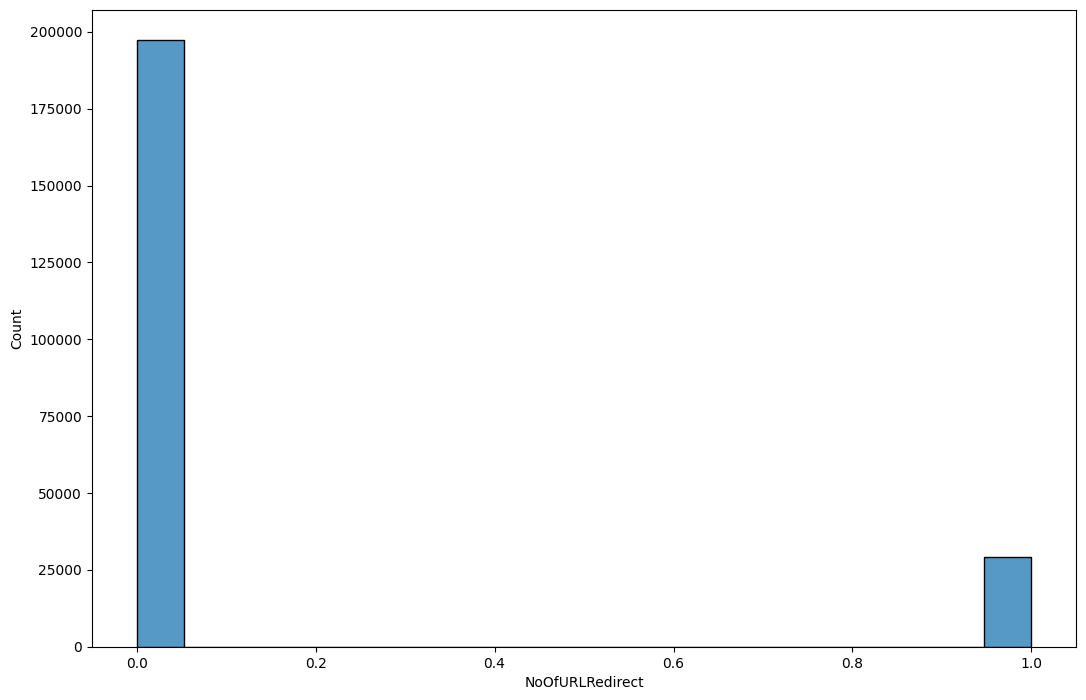

In [367]:
sn.histplot(filtered['NoOfURLRedirect'])

## NoOfSelfRedirect

Количество перенаправлений URL сам на себя.

<Axes: xlabel='NoOfSelfRedirect', ylabel='Count'>

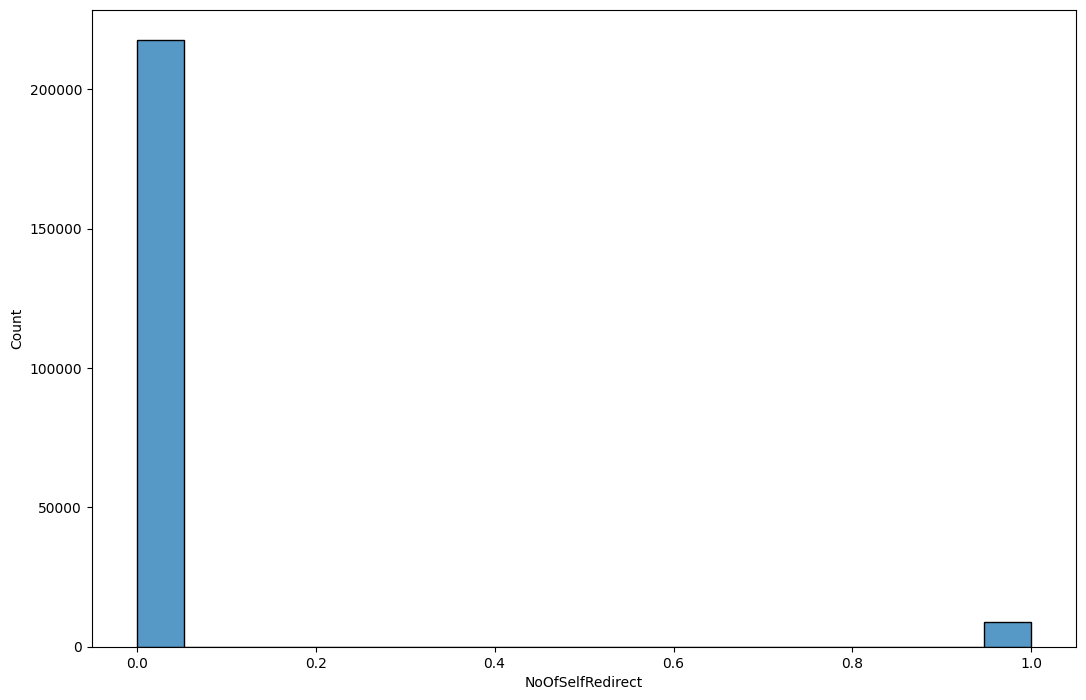

In [368]:
sn.histplot(filtered['NoOfSelfRedirect'])

In [369]:
filtered = filtered.drop(columns=["NoOfSelfRedirect"])

## HasExternalFormSubmit

Булевый индикатор, указывающий, отправляются ли формы в HTML на внешний домен.

<Axes: xlabel='HasExternalFormSubmit', ylabel='Count'>

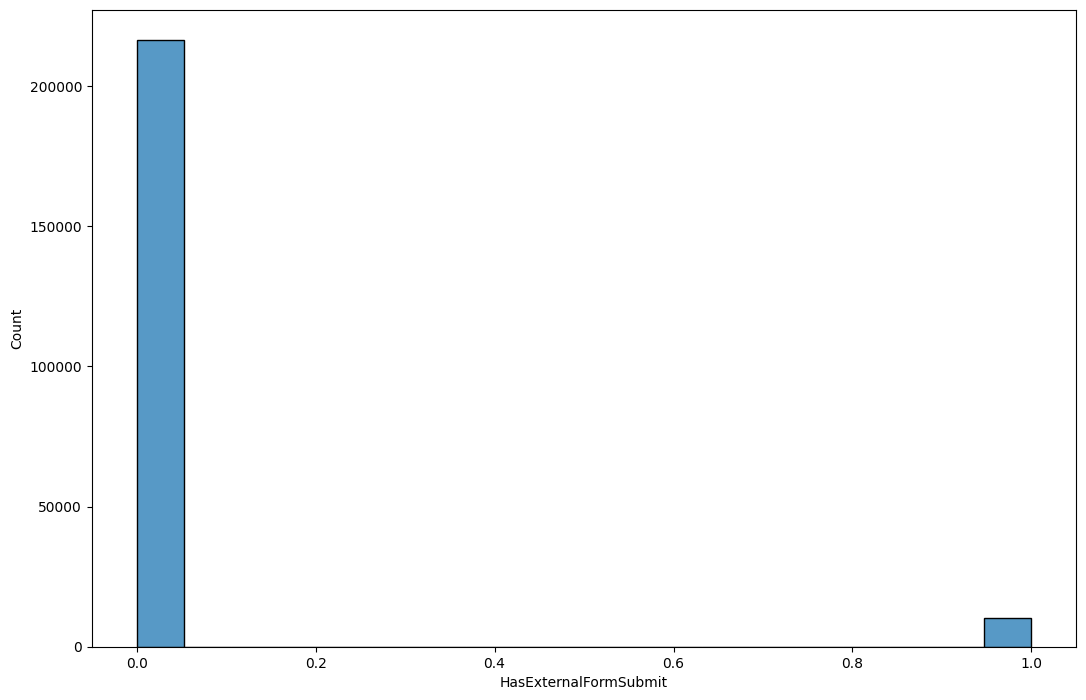

In [370]:
sn.histplot(filtered['HasExternalFormSubmit'])

In [371]:
filtered = filtered.drop(columns=["HasExternalFormSubmit"])

## HasSubmitButton

Булевый индикатор, указывающий, содержит ли HTML кнопку отправки формы.

<Axes: xlabel='HasSubmitButton', ylabel='Count'>

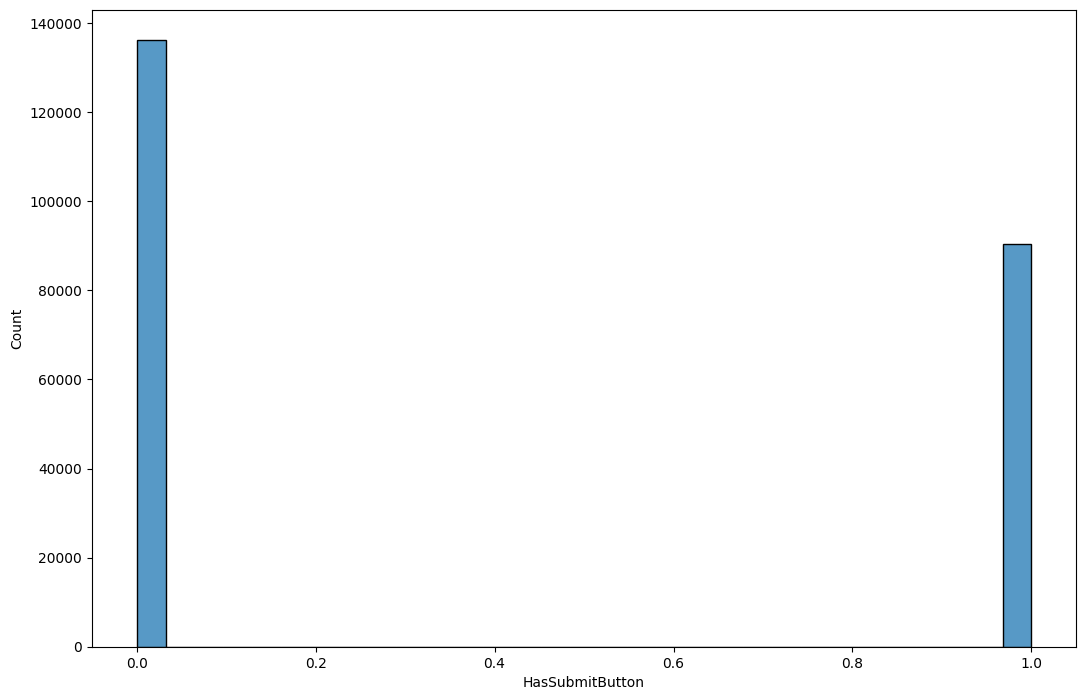

In [372]:
sn.histplot(filtered['HasSubmitButton'])

## HasHiddenFields

Булевый индикатор (1 или 0), указывающий, содержит ли HTML скрытые поля.

<Axes: xlabel='HasHiddenFields', ylabel='Count'>

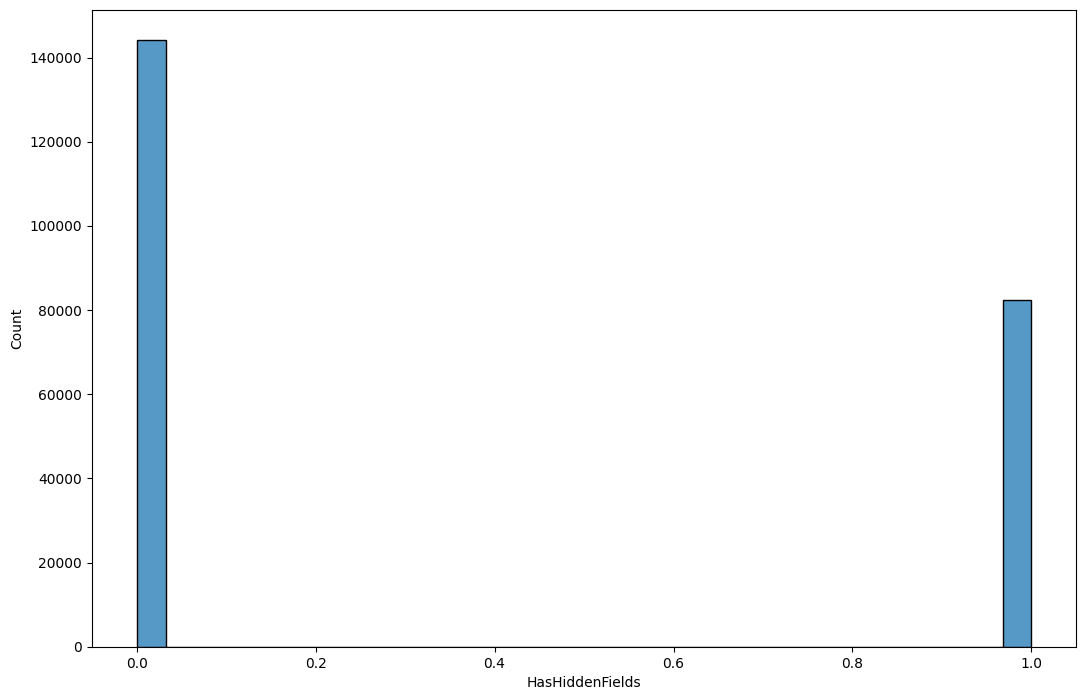

In [373]:
sn.histplot(filtered['HasHiddenFields'])

## HasPasswordField

Булевый индикатор, указывающий, содержит ли HTML поля для ввода пароля.

<Axes: xlabel='HasPasswordField', ylabel='Count'>

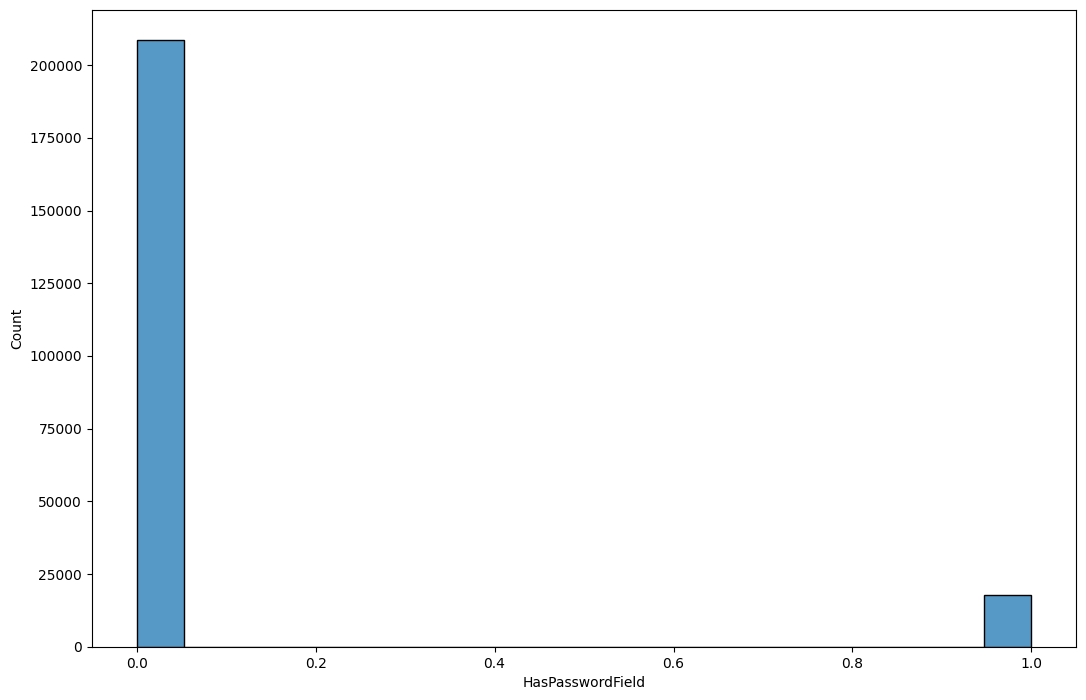

In [374]:
sn.histplot(filtered['HasPasswordField'])

In [375]:
print_binary_column_percents(filtered, 'HasPasswordField')

0: 92.07935218381873; 1: 7.920647816181275


In [376]:
filtered = filtered.drop(columns=["HasPasswordField"])

## Bank

Булевый индикатор, указывающий, содержит ли содержимое веб-страницы информацию о банковских услугах.

<Axes: xlabel='Bank', ylabel='Count'>

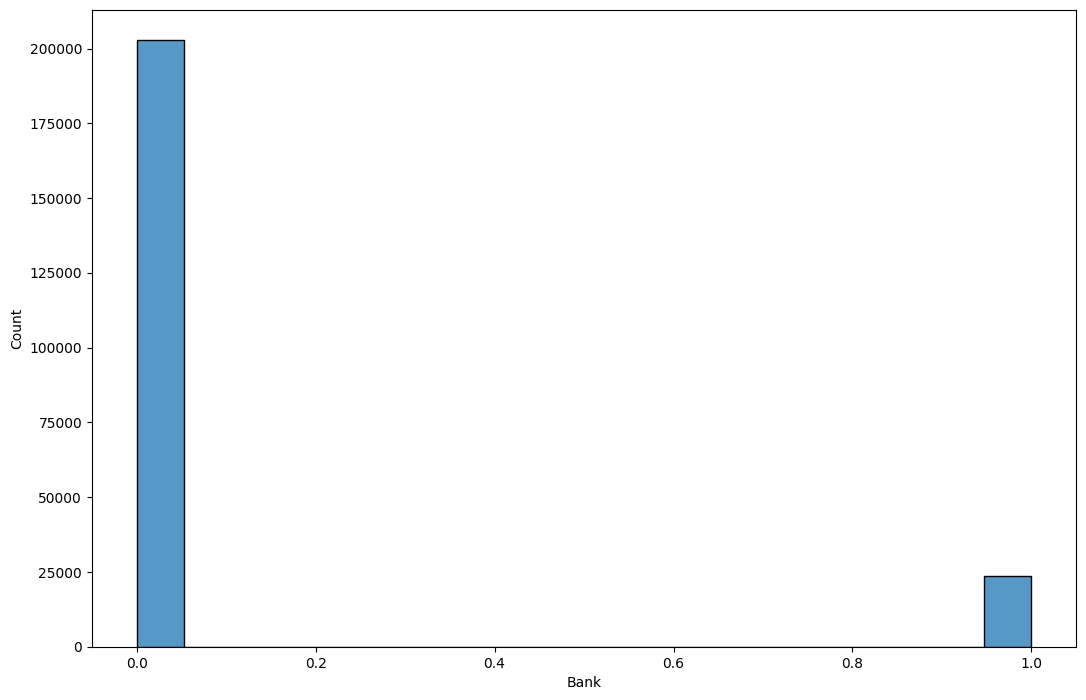

In [377]:
sn.histplot(filtered['Bank'])

In [378]:
print_binary_column_percents(filtered, 'Bank')

0: 89.53921689832394; 1: 10.460783101676057


## Pay

Булевый индикатор, указывающий, содержит ли содержимое веб-страницы информацию о платежных услугах.

<Axes: xlabel='Pay', ylabel='Count'>

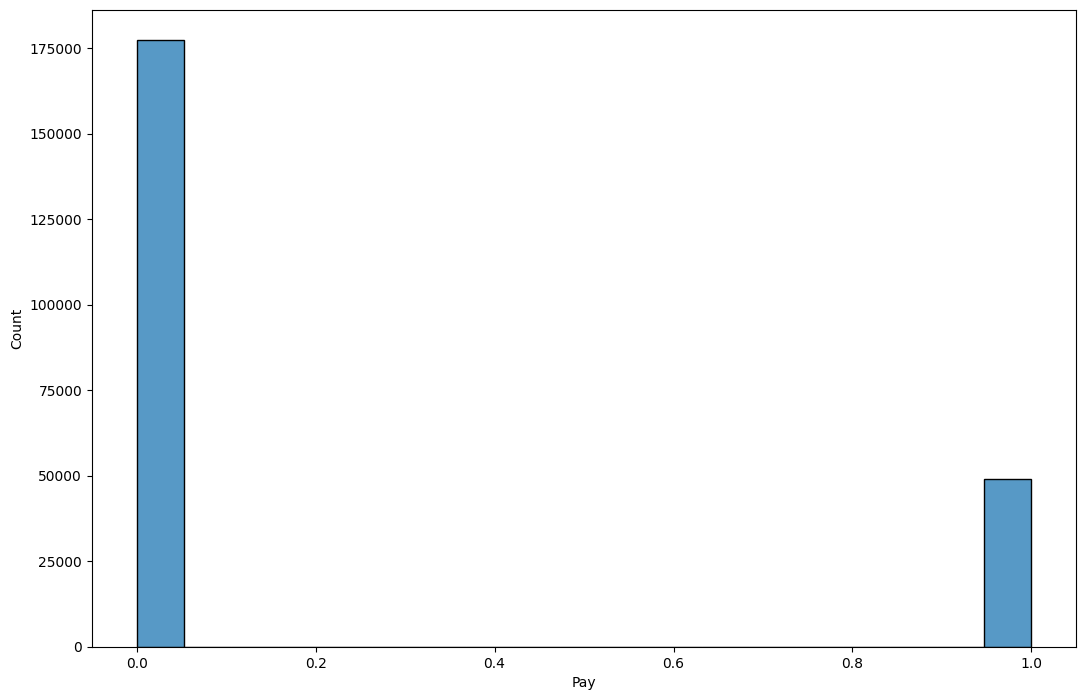

In [379]:
sn.histplot(filtered['Pay'])

## Crypto

Булевый индикатор, указывающий, содержит ли содержимое веб-страницы информацию о криптовалюте.

<Axes: xlabel='Crypto', ylabel='Count'>

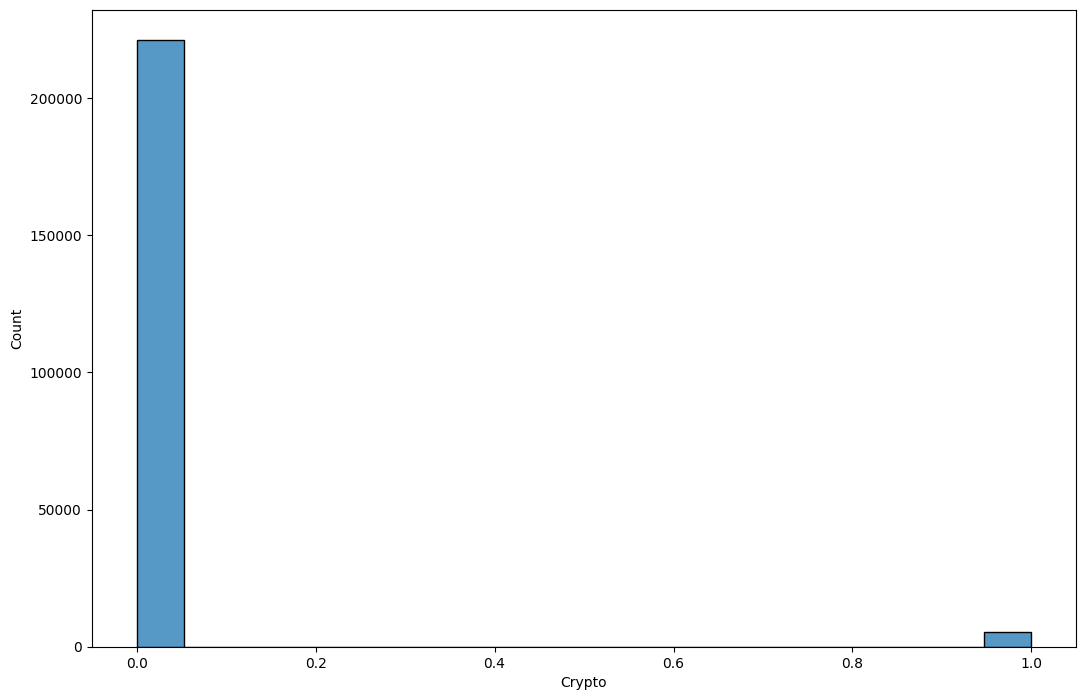

In [380]:
sn.histplot(filtered['Crypto'])

In [381]:
filtered = filtered.drop(columns=["Crypto"])

## NoOfImage

Количество изображений, встроенных в HTML.

<Axes: xlabel='NoOfImage', ylabel='Count'>

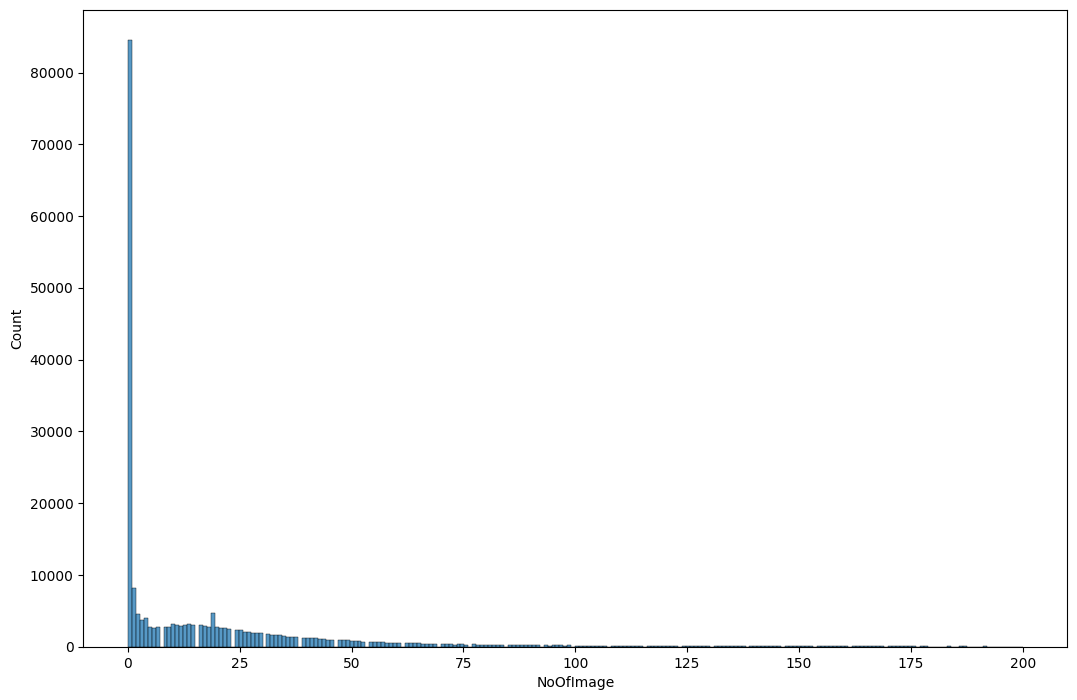

In [382]:
sn.histplot(filtered['NoOfImage'], binrange=[0, 200])

In [383]:
filtered = apply_3sigma_rule(filtered, 'NoOfImage')

In [384]:
filtered = filtered.reset_index(drop=True)

## Clear dataframe

In [385]:
selected_features = ['URLLength', 
                     'TLD', 
                     'IsHTTPS', 
                     'HasTitle', 
                     'HasFavicon', 
                     'IsResponsive', 
                     #'NoOfURLRedirect', 
                     'HasDescription', 
                     #'NoOfiFrame', 
                     'HasSocialNet', 
                     'HasSubmitButton', 
                     'HasHiddenFields', 
                     #'Bank', 
                     #'Pay', 
                     'HasCopyrightInfo', 
                     'NoOfImage', 
                     'label']

In [386]:
filtered = filtered[selected_features]

## Encode TLDs

In [387]:
encoder = OneHotEncoder(sparse_output=False)
encoded_tlds = encoder.fit_transform(filtered[['TLD']])
encoded_tld_df = pd.DataFrame(encoded_tlds, columns=encoder.get_feature_names_out(['TLD']))

In [388]:
filtered = pd.concat([filtered, encoded_tld_df], axis=1)

In [389]:
filtered

,URLLength,TLD,IsHTTPS,HasTitle,HasFavicon,IsResponsive,HasDescription,HasSocialNet,HasSubmitButton,HasHiddenFields,...,TLD_xyz,TLD_yachts,TLD_ye,TLD_yoga,TLD_youtube,TLD_yt,TLD_za,TLD_zm,TLD_zone,TLD_zw
0,31,com,1,1,0,1,0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,23,de,1,1,1,0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,29,uk,1,1,0,1,1,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26,com,1,1,0,1,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30,org,1,1,0,1,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224355,29,com,1,1,1,1,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
224356,28,uk,1,1,1,1,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
224357,30,be,1,1,1,1,1,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
224358,55,dev,1,1,0,1,0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [390]:
filtered = filtered.drop(columns=['TLD'])

## Correlation

In [391]:
correlation_df = filtered[['URLLength', 
                           'IsHTTPS', 
                           'HasTitle', 
                           'HasFavicon', 
                           'IsResponsive', 
                           #'NoOfURLRedirect', 
                           'HasDescription', 
                           #'NoOfiFrame', 
                           'HasSocialNet', 
                           'HasSubmitButton', 
                           'HasHiddenFields', 
                           #'Bank', 
                           #'Pay', 
                           'HasCopyrightInfo', 
                           'NoOfImage', 
                           'label']]

In [392]:
correlation_df

,URLLength,IsHTTPS,HasTitle,HasFavicon,IsResponsive,HasDescription,HasSocialNet,HasSubmitButton,HasHiddenFields,HasCopyrightInfo,NoOfImage,label
0,31,1,1,0,1,0,0,1,1,1,34,1
1,23,1,1,1,0,0,1,1,0,1,50,1
2,29,1,1,0,1,1,0,1,1,1,10,1
3,26,1,1,0,1,0,1,1,1,1,3,1
4,30,1,1,0,1,1,1,0,1,1,35,1
...,...,...,...,...,...,...,...,...,...,...,...,...
224355,29,1,1,1,1,1,1,1,1,1,51,1
224356,28,1,1,1,1,1,1,1,1,0,50,1
224357,30,1,1,1,1,1,1,1,0,1,27,1
224358,55,1,1,0,1,0,0,1,1,0,0,0


<Axes: >

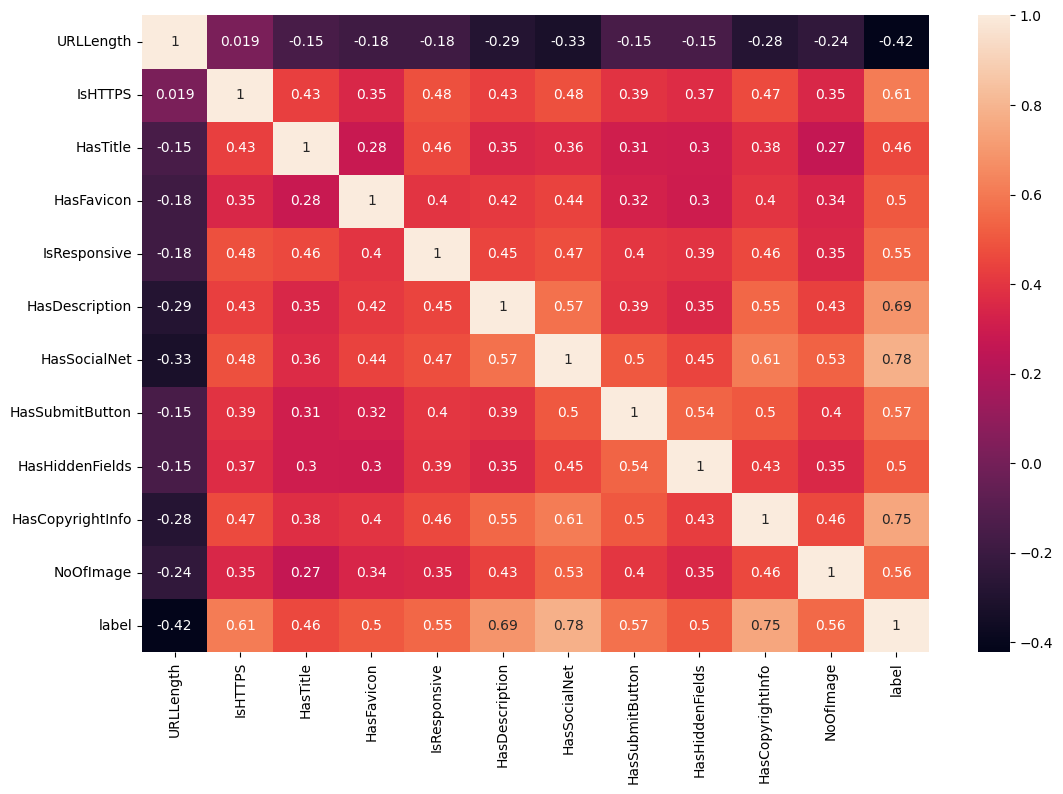

In [393]:
sn.heatmap(correlation_df.corr(), annot=True)

In [394]:
train_df, test_df = train_test_split(filtered, test_size=0.9)

# Кластеризация

In [395]:
X_clusterization = train_df.drop(columns=['label'])

In [396]:
X_clusterization

,URLLength,IsHTTPS,HasTitle,HasFavicon,IsResponsive,HasDescription,HasSocialNet,HasSubmitButton,HasHiddenFields,HasCopyrightInfo,...,TLD_xyz,TLD_yachts,TLD_ye,TLD_yoga,TLD_youtube,TLD_yt,TLD_za,TLD_zm,TLD_zone,TLD_zw
7410,22,1,1,1,1,1,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
210472,50,1,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145095,25,1,1,0,1,1,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
141047,20,1,1,1,1,1,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105486,30,1,1,1,1,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143813,38,1,1,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107327,34,1,1,1,1,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55598,25,1,1,1,1,1,1,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65052,21,1,1,1,1,0,1,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [397]:
kmeans = KMeans(n_clusters=2)
cluster_labels = kmeans.fit_predict(X_clusterization)

## Визуализация кластеризации

In [398]:
tsne_res = TSNE(n_components=2, random_state=34).fit_transform(X_clusterization)

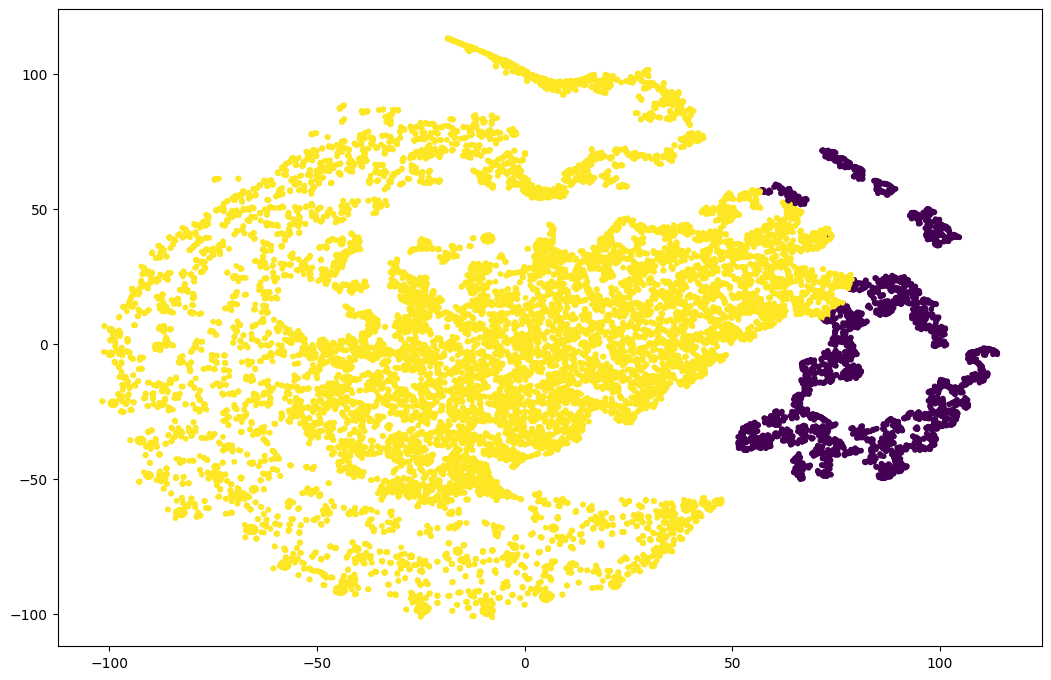

In [399]:
plt.scatter(tsne_res[:, 0], tsne_res[:, 1], c=cluster_labels, s=10, cmap='viridis')
plt.show()

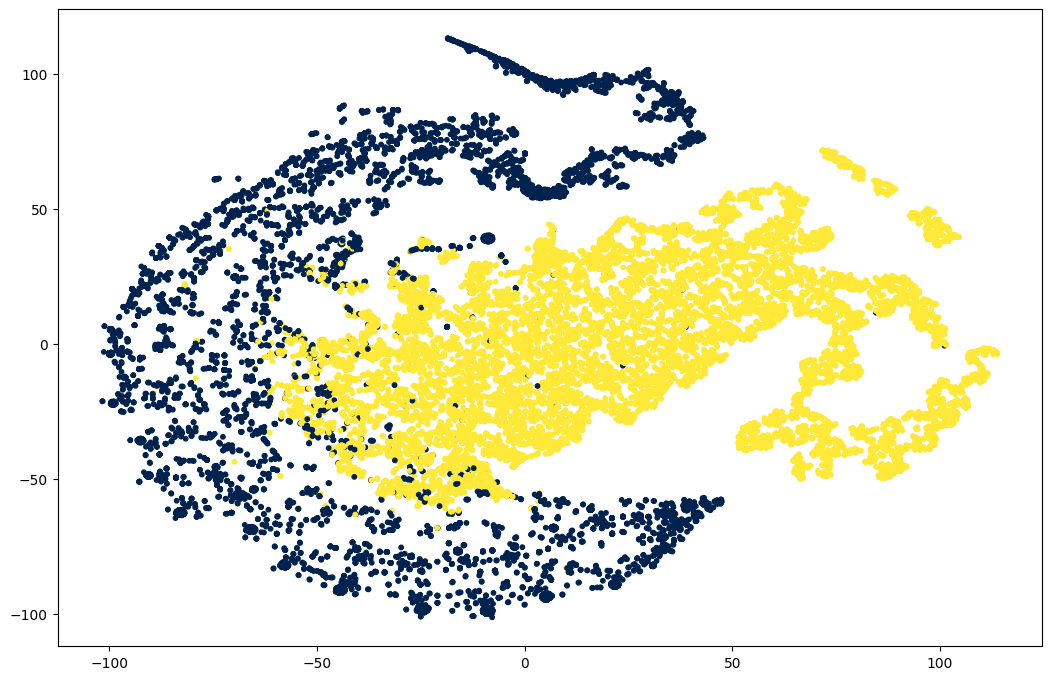

In [400]:
plt.scatter(tsne_res[:, 0], tsne_res[:, 1], c=train_df['label'], s=10, cmap='cividis')
plt.show()

# Логистическая регрессия

In [401]:
train_df['cluster'] = cluster_labels

In [402]:
X = train_df.drop(columns=['cluster', 'label'])
y = train_df['cluster']

In [403]:
logistic_model = LogisticRegression()
logistic_model.fit(X, y)

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [404]:
X_test = test_df.drop(columns=['label'])
y_test = test_df['label']

y_pred = logistic_model.predict(X_test)

In [405]:
r_score = rand_score(y_test, y_pred)
s_score = silhouette_score(train_df.drop(columns=['cluster', 'label']), train_df['cluster'])

print(f"Rand Score: {r_score}")
print(f"Silhouette Score: {s_score}")

Rand Score: 0.5116896797577342
Silhouette Score: 0.6198531517837026


**Rand Score** измеряет схожесть между двумя разбиениями, истинным и предсказанным, и варьируется от 0 до 1. Значение 0.514 указывает на то, что около 51.4% пар объектов правильно отнесены к одному и тому же кластеру или к разным кластерам. Это значение указывает на средний уровень соответствия кластеров.

**Silhouette Score** измеряет качество кластеризации. Он варьируется от -1 до 1, где более высокие значения указывают на лучшее соответствие объектов своим кластерам. Значение 0.612 считается достаточно хорошим и указывает на то, что объекты, как правило, ближе к центру своего кластера, чем к центрам других кластеров.